<div style="text-align: center; padding: 10px; background-color: #cd0626; color:#ffffff; font-size: 40px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">INDICATORS OF HEART DISEASE</div>


<div style="text-align: center; padding: 10px; color:#cd0626; font-size: 30px;">Josephine Taiwo Kayode</div>

><img src = "img/iml.jpg" style="display: block; margin: auto;" />/>

<div style="text-align: Left; padding: 10px; background-color: #a90822; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">1.0 Project Overview</div>

Introduction: Heart disease is a major health concern globally, so we're using data science to understand what factors contribute to it.

Dataset: We've gathered information on various factors like age, blood pressure, cholesterol levels, and lifestyle habits from individuals, along with whether they have heart disease or not.

Objectives: We want to find out which factors are linked to heart attack and build a model that can predict someone's risk of having a heart attack based on their information.

Methodology: We'll analyze the data to see which factors seem to be associated with heart attack. Then, we'll use machine learning to build a tool that can predict if someone might have a heart attack based on their details.

Results and Insights: We'll identify key factors that are strongly linked to heart attack and create a tool that can help identify people who might be at risk. This will help healthcare professionals make better decisions and could lead to improved prevention and treatment strategies.



<div style="text-align: Left; padding: 10px; background-color: #a90822;; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">2.0 Data Collection</div>

## 2.1 Importing Packages

The dataset used in this project was gotten from kaggle

In [7]:
#Data Loading and Preprocessing
import pandas as pd #For data manipulation and analysis.
import numpy as np  #For numerical operations on arrays and matrices.
import re #Regular expression library for string manipulation.
import string #Provides common string operations.

#Data Visualization
import seaborn as sns #For creating visualizations and plots.
import matplotlib.pyplot as plt #For creating interactive and static plots using Plotly.

#Data Encoding and Transformation
from sklearn.preprocessing import OneHotEncoder #For encoding categorical features.
from sklearn.preprocessing import LabelEncoder  #For encoding categorical features.

# data modelling
from sklearn.model_selection import train_test_split

# For data modeling 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


# data evaluation 
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pickle as pkl


import warnings #For handling warnings
warnings.filterwarnings("ignore")


## 2.2 Import Datasets

In [8]:
df = pd.read_csv("dataset/dataset.csv")

This import dataset section serves as the foundational step in our data science journey. It connects us to the raw data, transforms it into a manageable format, and provides an initial glimpse into its characteristics. As we proceed, we'll delve deeper into the dataset, exploring patterns, cleaning inconsistencies, and ultimately developing a predictive model for heart disease.

In [9]:
df.head(10)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
5,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.85,120.20,34.96,Yes,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
6,Alabama,Female,Good,3.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,"6 or more, but not all",No,...,1.63,88.00,33.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
7,Alabama,Male,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,Yes,...,1.75,74.84,24.37,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
8,Alabama,Male,Good,2.0,0.0,5 or more years ago,No,6.0,None of them,No,...,1.70,78.02,26.94,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
9,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.68,63.50,22.60,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [40]:
df["DifficultyErrands"]

0         No
1         No
2         No
3         No
4         No
          ..
246017    No
246018    No
246019    No
246020    No
246021    No
Name: DifficultyErrands, Length: 246022, dtype: object

<div style="text-align: Left; padding: 10px; background-color: #a90822;; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">3.0 Exploratory Data Analysis</div>

## 3.1 Preliminary Data Analysis

Preliminary analysis, also known as initial analysis, refers to the early stage of data examination conducted to get a first look at the dataset and gain a basic understanding of its characteristics. This stage is crucial in data analysis as it helps identify patterns, trends, potential issues, and initial insights before deeper analyses.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [6]:
df.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

We discovered that the dataset has 40 columns with 246022 entries. The Target variable is "HadHeartAttack" which is an object. The dataset contains no unnamed variable.

## 3.2 BIVARIATE ANALYSIS

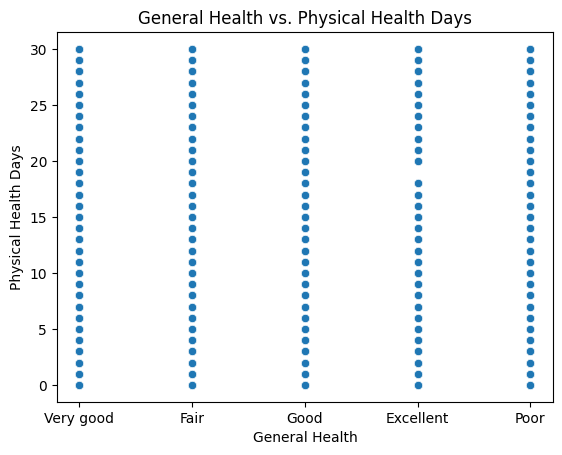

In [7]:
sns.scatterplot(x='GeneralHealth', y='PhysicalHealthDays', data=df)
plt.xlabel('General Health')
plt.ylabel('Physical Health Days')
plt.title('General Health vs. Physical Health Days')
plt.show()

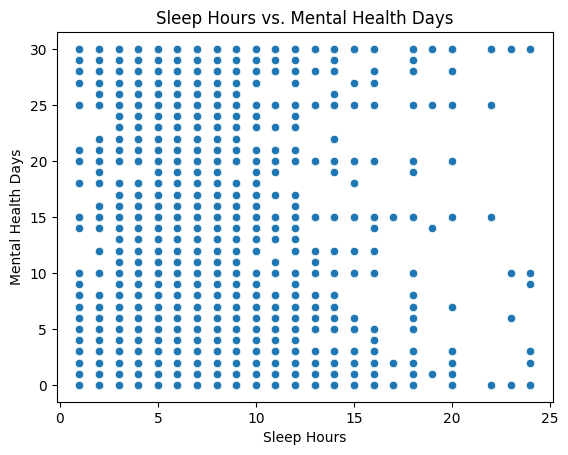

In [8]:
sns.scatterplot(x='SleepHours', y='MentalHealthDays', data=df)
plt.xlabel('Sleep Hours')
plt.ylabel('Mental Health Days')
plt.title('Sleep Hours vs. Mental Health Days')
plt.show()

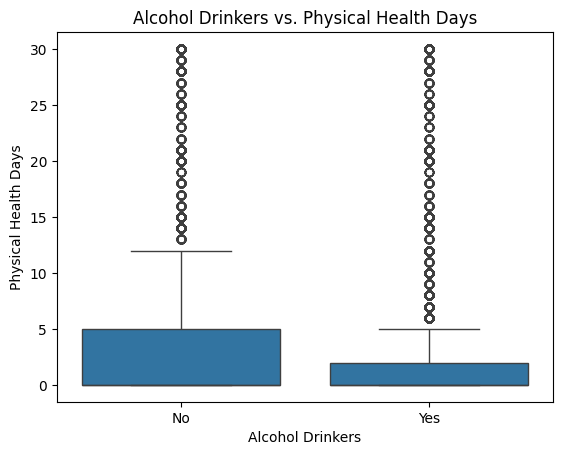

In [9]:
sns.boxplot(x='AlcoholDrinkers', y='PhysicalHealthDays', data=df)
plt.xlabel('Alcohol Drinkers')
plt.ylabel('Physical Health Days')
plt.title('Alcohol Drinkers vs. Physical Health Days')
plt.show()

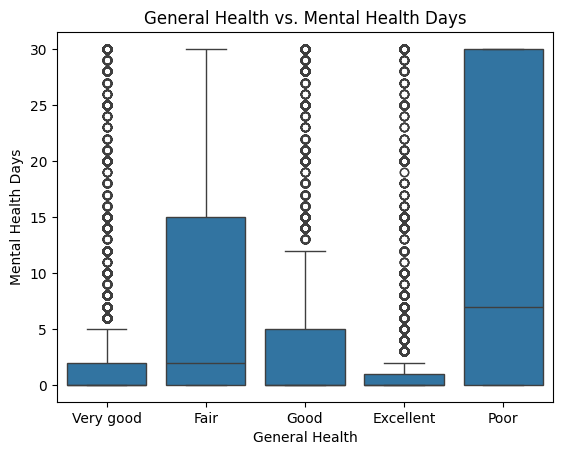

In [10]:
sns.boxplot(x='GeneralHealth', y='MentalHealthDays', data=df)
plt.xlabel('General Health')
plt.ylabel('Mental Health Days')
plt.title('General Health vs. Mental Health Days')
plt.show()

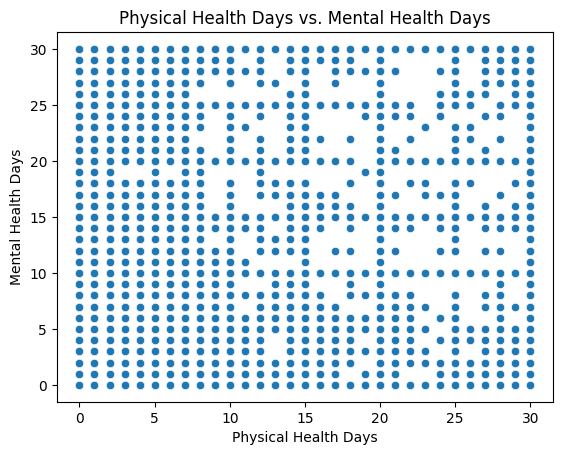

In [11]:
sns.scatterplot(x='PhysicalHealthDays', y='MentalHealthDays', data=df)
plt.xlabel('Physical Health Days')
plt.ylabel('Mental Health Days')
plt.title('Physical Health Days vs. Mental Health Days')
plt.show()

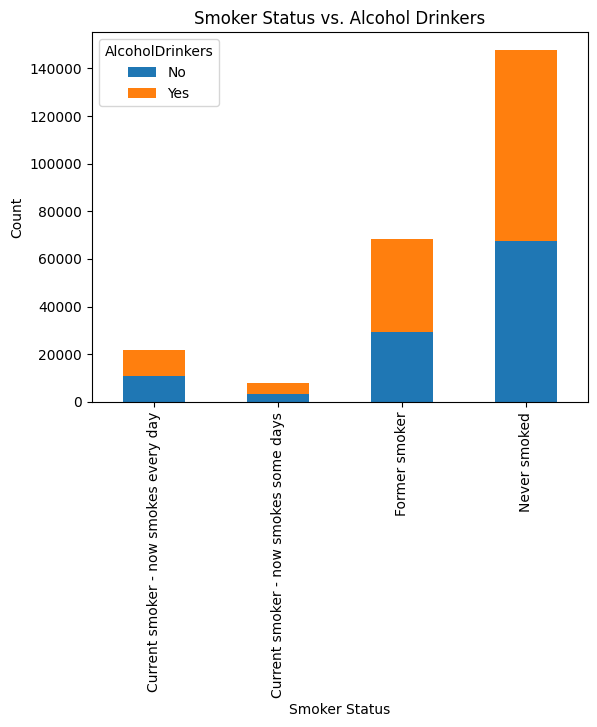

In [12]:
pd.crosstab(df['SmokerStatus'], df['AlcoholDrinkers']).plot(kind='bar', stacked=True)
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.title('Smoker Status vs. Alcohol Drinkers')
plt.show()

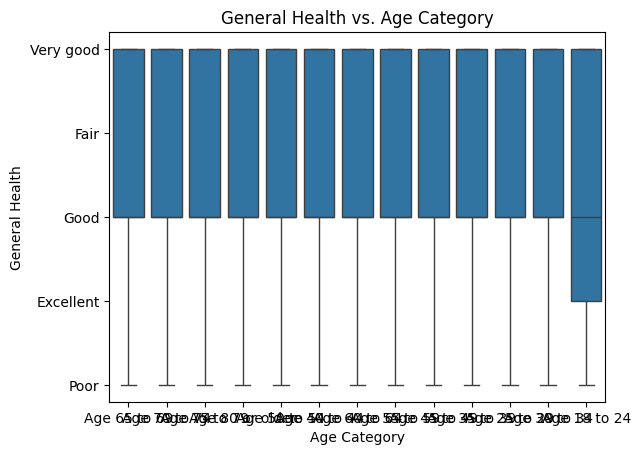

In [13]:
sns.boxplot(x='AgeCategory', y='GeneralHealth', data=df)
plt.xlabel('Age Category')
plt.ylabel('General Health')
plt.title('General Health vs. Age Category')
plt.show()

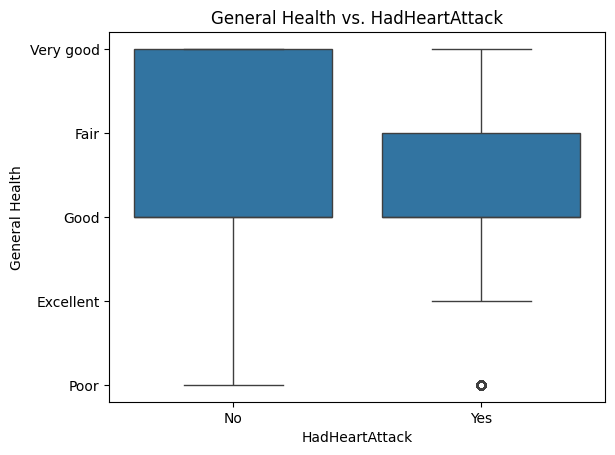

In [14]:
sns.boxplot(x="HadHeartAttack", y='GeneralHealth', data=df)
plt.xlabel("HadHeartAttack")
plt.ylabel('General Health')
plt.title('General Health vs. HadHeartAttack')
plt.show()

Insight: Individuals with lower self-assessed general health tend to have a higher likelihood of heart attack indicators. This suggests that general health perception is associated with heart health.

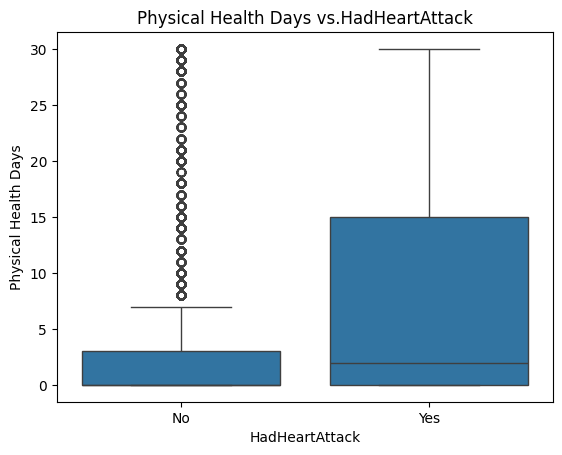

In [15]:
sns.boxplot(x='HadHeartAttack', y='PhysicalHealthDays', data=df)
plt.xlabel('HadHeartAttack')
plt.ylabel('Physical Health Days')
plt.title('Physical Health Days vs.HadHeartAttack')
plt.show()

Insight: There is a correlation between the number of days respondents' physical health was not good and the presence of heart attack indicators. Individuals experiencing more frequent physical health issues have a higher risk of heart attack.

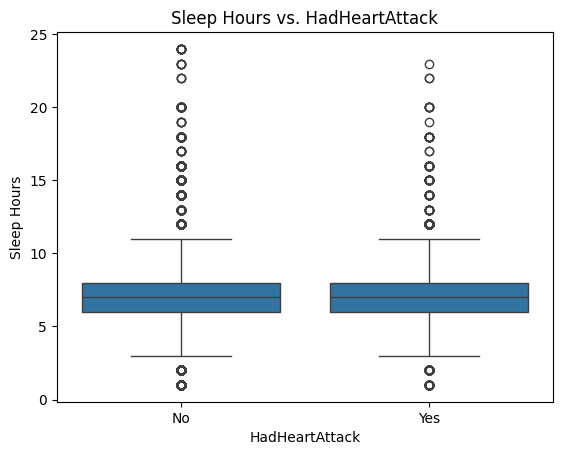

In [16]:
sns.boxplot(x='HadHeartAttack', y='SleepHours', data=df)
plt.xlabel('HadHeartAttack')
plt.ylabel('Sleep Hours')
plt.title('Sleep Hours vs. HadHeartAttack')
plt.show()

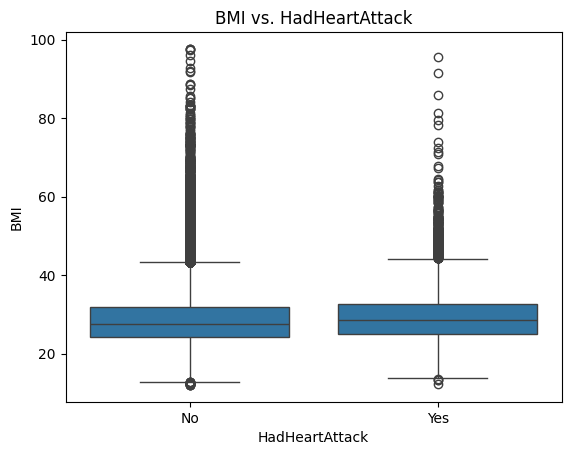

In [17]:
sns.boxplot(x='HadHeartAttack', y='BMI', data=df)
plt.xlabel('HadHeartAttack')
plt.ylabel('BMI')
plt.title('BMI vs. HadHeartAttack')
plt.show()

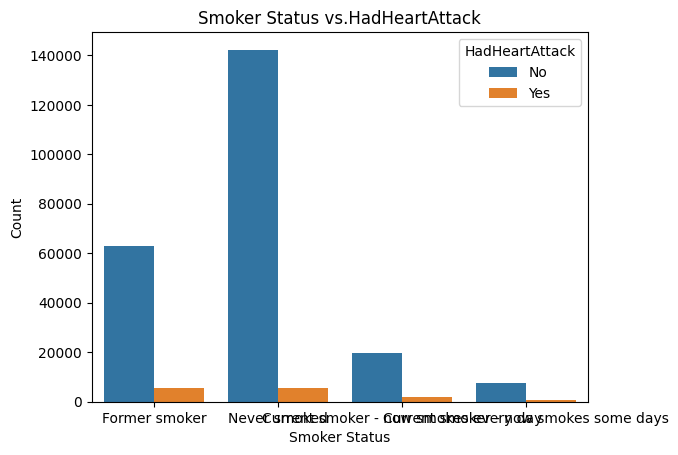

In [18]:
sns.countplot(x='SmokerStatus', hue='HadHeartAttack', data=df)
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.title('Smoker Status vs.HadHeartAttack')
plt.show()

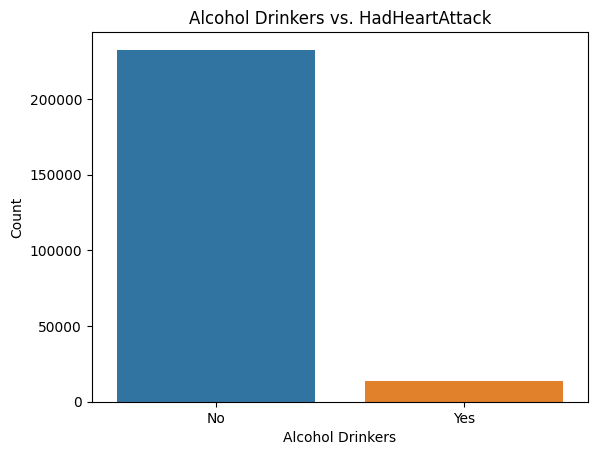

In [19]:
sns.countplot(x='HadHeartAttack', hue='HadHeartAttack', data=df)
plt.xlabel('Alcohol Drinkers')
plt.ylabel('Count')
plt.title('Alcohol Drinkers vs. HadHeartAttack')
plt.show()

<div style="text-align: Left; padding: 10px; background-color: #a90822;; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">4.0 Data Preprocessing</div>

Time to prep our data for the spotlight! In the Data Preprocessing phase, we'll clean, organize, and get our dataset ready for the main stage. It's like setting the scene before a performance—handling missing values, smoothing out rough edges, and ensuring our data is in tip-top shape.

In this phase, the LabelEncoder was employed as a crucial component. This encoder was employed to transform the categorical variables into a numerical format, to facilitate the inclusion of the variables in the selected machine learning model.

In [20]:
encoder = LabelEncoder()

In [21]:
df["State"] = encoder.fit_transform(df["State"])
df["Sex"] = encoder.fit_transform(df["Sex"])
df["GeneralHealth"] = encoder.fit_transform(df["GeneralHealth"])
df["LastCheckupTime"] = encoder.fit_transform(df["LastCheckupTime"])
df["PhysicalActivities"] = encoder.fit_transform(df["PhysicalActivities"])
df["RemovedTeeth"] = encoder.fit_transform(df["RemovedTeeth"])
df["HadHeartAttack"] = encoder.fit_transform(df["HadHeartAttack"])
df["HadAngina"] = encoder.fit_transform(df["HadAngina"])
df["HadStroke"] = encoder.fit_transform(df["HadStroke"])
df["HadAsthma"] = encoder.fit_transform(df["HadAsthma"])
df["HadSkinCancer"] = encoder.fit_transform(df["HadSkinCancer"])
df["HadCOPD"] = encoder.fit_transform(df["HadCOPD"])
df["HadDepressiveDisorder"] = encoder.fit_transform(df["HadDepressiveDisorder"])
df["HadKidneyDisease"] = encoder.fit_transform(df["HadKidneyDisease"])
df["HadArthritis"] = encoder.fit_transform(df["HadArthritis"])
df["HadDiabetes"] = encoder.fit_transform(df["HadDiabetes"])
df["DeafOrHardOfHearing"] = encoder.fit_transform(df["DeafOrHardOfHearing"])
df["BlindOrVisionDifficulty"] = encoder.fit_transform(df["BlindOrVisionDifficulty"])
df["DifficultyConcentrating"] = encoder.fit_transform(df["DifficultyConcentrating"])
df["DifficultyWalking"] = encoder.fit_transform(df["DifficultyWalking"])
df["DifficultyDressingBathing"] = encoder.fit_transform(df["DifficultyDressingBathing"])
df["DifficultyErrands"] = encoder.fit_transform(df["DifficultyErrands"])
df["SmokerStatus"] = encoder.fit_transform(df["SmokerStatus"])
df["ECigaretteUsage"] = encoder.fit_transform(df["ECigaretteUsage"])
df["ChestScan"] = encoder.fit_transform(df["ChestScan"])
df["RaceEthnicityCategory"] = encoder.fit_transform(df["RaceEthnicityCategory"])
df["AgeCategory"] = encoder.fit_transform(df["AgeCategory"])
df["HeightInMeters"] = encoder.fit_transform(df["HeightInMeters"])
df["WeightInKilograms"] = encoder.fit_transform(df["WeightInKilograms"])
df["BMI"] = encoder.fit_transform(df["BMI"])
df["AlcoholDrinkers"] = encoder.fit_transform(df["AlcoholDrinkers"])
df["HIVTesting"] = encoder.fit_transform(df["HIVTesting"])
df["FluVaxLast12"] = encoder.fit_transform(df["FluVaxLast12"])
df["PneumoVaxEver"] = encoder.fit_transform(df["PneumoVaxEver"])
df["TetanusLast10Tdap"] = encoder.fit_transform(df["TetanusLast10Tdap"])
df["HighRiskLastYear"] = encoder.fit_transform(df["HighRiskLastYear"])
df["CovidPos"] = encoder.fit_transform(df["CovidPos"])


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  int32  
 1   Sex                        246022 non-null  int32  
 2   GeneralHealth              246022 non-null  int32  
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  int32  
 6   PhysicalActivities         246022 non-null  int32  
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  int32  
 9   HadHeartAttack             246022 non-null  int32  
 10  HadAngina                  246022 non-null  int32  
 11  HadStroke                  246022 non-null  int32  
 12  HadAsthma                  246022 non-null  int32  
 13  HadSkinCancer              24

### 4.1 SPLITTING THE DATASET INTO TRAIN AND TEST

Let's divide and conquer! In this section, we're splitting our data into two squads: the Training Team and the Test Team.

The Training Team will learn the patterns and tricks from our dataset, while the Test Team will show us how well they've mastered it. Think of it as preparing for a big game – we train hard and then test our skills.

In this case, 80% of the dataset was kept for training and the remaining 20% for splitting.

Get ready for some data athleticism!

In [23]:
df["HadHeartAttack"]

0         0
1         0
2         0
3         0
4         0
         ..
246017    0
246018    0
246019    0
246020    0
246021    1
Name: HadHeartAttack, Length: 246022, dtype: int32

In [24]:
y = df["HadHeartAttack"]
X = df.drop("HadHeartAttack", axis = 1)

In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HadHeartAttack, dtype: int32

In [27]:
X.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,4,4.0,0.0,3,1,9.0,3,0,...,47,121,1191,0,0,1,1,1,0,0
1,0,1,4,0.0,0.0,3,1,6.0,3,0,...,65,196,1382,0,0,1,1,2,0,0
2,0,1,4,0.0,0.0,3,0,8.0,1,0,...,72,238,1514,1,0,0,1,0,0,2
3,0,0,1,5.0,0.0,3,1,9.0,3,0,...,57,181,1482,0,0,1,1,0,0,2
4,0,0,2,3.0,15.0,3,1,5.0,0,0,...,42,146,1635,0,0,1,1,0,0,0


In [28]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2)

In [29]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196817 entries, 202263 to 55337
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      196817 non-null  int32  
 1   Sex                        196817 non-null  int32  
 2   GeneralHealth              196817 non-null  int32  
 3   PhysicalHealthDays         196817 non-null  float64
 4   MentalHealthDays           196817 non-null  float64
 5   LastCheckupTime            196817 non-null  int32  
 6   PhysicalActivities         196817 non-null  int32  
 7   SleepHours                 196817 non-null  float64
 8   RemovedTeeth               196817 non-null  int32  
 9   HadAngina                  196817 non-null  int32  
 10  HadStroke                  196817 non-null  int32  
 11  HadAsthma                  196817 non-null  int32  
 12  HadSkinCancer              196817 non-null  int32  
 13  HadCOPD                    196

In [30]:
testX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49205 entries, 82411 to 26338
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      49205 non-null  int32  
 1   Sex                        49205 non-null  int32  
 2   GeneralHealth              49205 non-null  int32  
 3   PhysicalHealthDays         49205 non-null  float64
 4   MentalHealthDays           49205 non-null  float64
 5   LastCheckupTime            49205 non-null  int32  
 6   PhysicalActivities         49205 non-null  int32  
 7   SleepHours                 49205 non-null  float64
 8   RemovedTeeth               49205 non-null  int32  
 9   HadAngina                  49205 non-null  int32  
 10  HadStroke                  49205 non-null  int32  
 11  HadAsthma                  49205 non-null  int32  
 12  HadSkinCancer              49205 non-null  int32  
 13  HadCOPD                    49205 non-null  int3

In [31]:
trainy.info()

<class 'pandas.core.series.Series'>
Index: 196817 entries, 202263 to 55337
Series name: HadHeartAttack
Non-Null Count   Dtype
--------------   -----
196817 non-null  int32
dtypes: int32(1)
memory usage: 2.3 MB


In [32]:
testy.info()

<class 'pandas.core.series.Series'>
Index: 49205 entries, 82411 to 26338
Series name: HadHeartAttack
Non-Null Count  Dtype
--------------  -----
49205 non-null  int32
dtypes: int32(1)
memory usage: 576.6 KB


<div style="text-align: Left; padding: 10px; background-color: #a90822;; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">5.0 Modelling and Evaluation</div>

Time to bring in the heavyweights – welcome to the Modeling and Evaluation arena!

In this section, we're unleashing our machine-learning models on the data. It's like a high-stakes match where algorithms compete to make the best Heart disease predictions.

We'll also be the judges, evaluating their performance to find the superstar model.

Get your front-row seat as we dive into the thrilling world of modeling and crunch the numbers to find our data champion!

In [169]:
performance_table = {}

### 5.1 DECISION TREE CLASSIFIER

In [170]:
model1 = DecisionTreeClassifier()

In [171]:
model1.fit(trainX, trainy)

DecisionTreeClassifier()

In [172]:
pred1 = model1.predict(testX)
pred1

array([0, 0, 0, ..., 0, 0, 0])

In [173]:
report1 = classification_report(testy, pred1, target_names = ["0", "1"] )

recall = recall_score(pred1, testy, average='micro')
precision = precision_score(pred1, testy, average='micro')
fi_score = f1_score(pred1, testy, average='micro')

performance_table.update({'Decision Tree': [recall, precision, fi_score]})

print(report1)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     46592
           1       0.25      0.30      0.27      2613

    accuracy                           0.91     49205
   macro avg       0.60      0.62      0.61     49205
weighted avg       0.92      0.91      0.92     49205



In [174]:
performance_table

{'Decision Tree': [0.914500558886292, 0.914500558886292, 0.914500558886292]}

### 5.2 RANDOM FOREST CLASSIFIER

In [175]:
model2 = RandomForestClassifier()

In [176]:
model2.fit(trainX, trainy)

RandomForestClassifier()

In [177]:
pred2 = model2.predict(testX)
pred2

array([0, 0, 0, ..., 0, 0, 0])

In [178]:
report2 = classification_report(testy, pred2, target_names = ["0", "1"] )

recall = recall_score(pred2, testy, average='micro')
precision = precision_score(pred2, testy, average='micro')
fi_score = f1_score(pred2, testy, average='micro')

performance_table.update({'Random Forest': [recall, precision, fi_score]})

print(report2)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46592
           1       0.55      0.17      0.26      2613

    accuracy                           0.95     49205
   macro avg       0.75      0.58      0.62     49205
weighted avg       0.93      0.95      0.94     49205



In [179]:
performance_table

{'Decision Tree': [0.914500558886292, 0.914500558886292, 0.914500558886292],
 'Random Forest': [0.9486434305456762, 0.9486434305456762, 0.9486434305456763]}

### 5.3 XGB CLASSIFIER

In [180]:
xgb = XGBClassifier()

In [181]:
xgb.fit(trainX, trainy)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [182]:
xgb_booster_pred = xgb.predict(testX)


In [183]:
xgb_booster_pred

array([0, 0, 0, ..., 0, 0, 0])

In [184]:
report3 = classification_report(testy, xgb_booster_pred, target_names = ["0", "1"] )

recall = recall_score(xgb_booster_pred, testy, average='micro')
precision = precision_score(xgb_booster_pred, testy, average='micro')
fi_score = f1_score(xgb_booster_pred, testy, average='micro')

performance_table.update({'XGB': [recall, precision, fi_score]})

print(report3)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46592
           1       0.55      0.24      0.33      2613

    accuracy                           0.95     49205
   macro avg       0.75      0.61      0.65     49205
weighted avg       0.94      0.95      0.94     49205



In [185]:
performance_table

{'Decision Tree': [0.914500558886292, 0.914500558886292, 0.914500558886292],
 'Random Forest': [0.9486434305456762, 0.9486434305456762, 0.9486434305456763],
 'XGB': [0.949212478406666, 0.949212478406666, 0.949212478406666]}

## 5.4 LOGISTIC REGRESSION

In [186]:
model4 = LogisticRegression()

In [187]:
model4.fit(trainX, trainy)

LogisticRegression()

In [188]:
pred4 = model4.predict(testX)
pred4

array([0, 0, 0, ..., 0, 0, 0])

In [189]:
report4 = classification_report(testy, pred4, target_names = ["0", "1"] )

recall = recall_score(pred4, testy, average='micro')
precision = precision_score(pred4, testy, average='micro')
fi_score = f1_score(pred4, testy, average='micro')

performance_table.update({'LogisticGregression': [recall, precision, fi_score]})

print(report4)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46592
           1       0.17      0.00      0.00      2613

    accuracy                           0.95     49205
   macro avg       0.56      0.50      0.49     49205
weighted avg       0.91      0.95      0.92     49205



In [190]:
performance_table

{'Decision Tree': [0.914500558886292, 0.914500558886292, 0.914500558886292],
 'Random Forest': [0.9486434305456762, 0.9486434305456762, 0.9486434305456763],
 'XGB': [0.949212478406666, 0.949212478406666, 0.949212478406666],
 'LogisticGregression': [0.9464282085153948,
  0.9464282085153948,
  0.9464282085153948]}

In [191]:
performance_table = pd.DataFrame(performance_table, index=['recall', 'precision', 'fi_score'])

performance_table = performance_table.T

performance_table

,recall,precision,fi_score
Decision Tree,0.914501,0.914501,0.914501
Random Forest,0.948643,0.948643,0.948643
XGB,0.949212,0.949212,0.949212
LogisticGregression,0.946428,0.946428,0.946428


<Axes: xlabel='recall', ylabel='precision'>

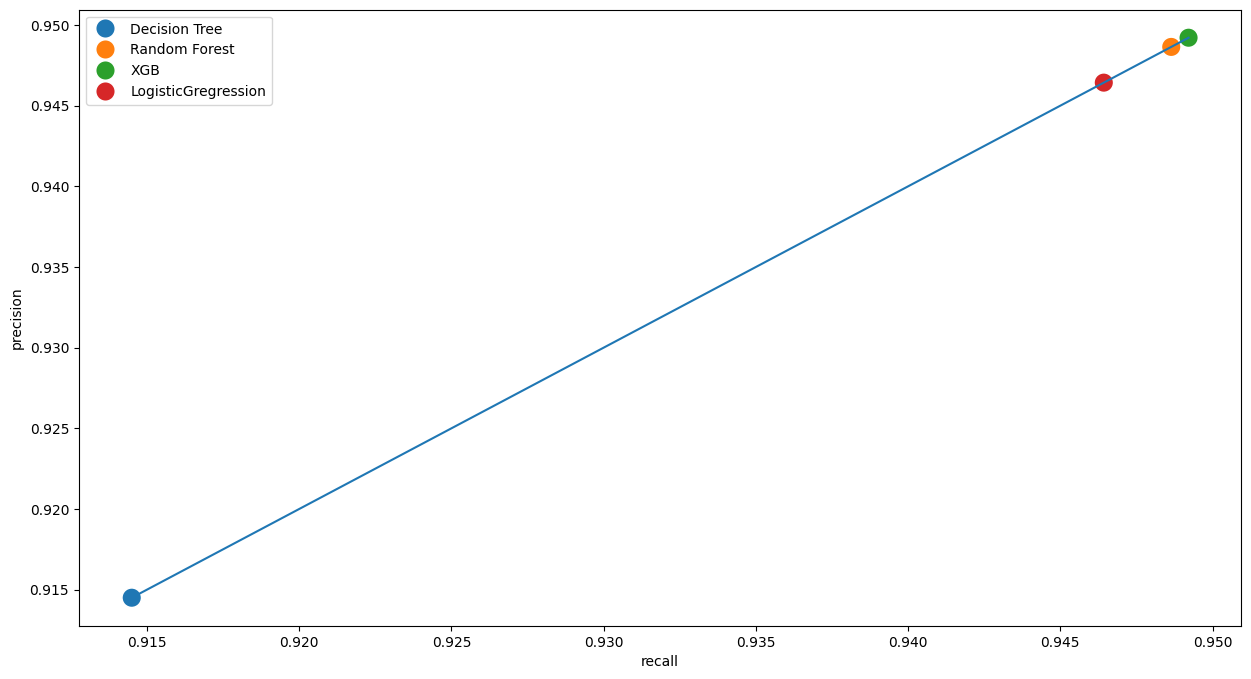

In [192]:
#scatter plot to compare the precision, accuracy, and recall of all the models
# scatter plot to compare the precision, accuracy and recall of all the models
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'recall', y = 'precision', data = performance_table, hue=performance_table.index, s=200)
sns.lineplot(x = 'recall', y = 'precision', data =performance_table)


## 5.5 SAVING THE MODELS/ ENCODER

Preserving brilliance, one byte at a time!

In the 'Saving the Models and Encoder' section, we're putting our winning machine-learning models and encoders into a digital vault.

It's like safeguarding our data superheroes for future missions. We'll store their knowledge and powers, ensuring they're ready to leap into action whenever the need arises.

Think of it as creating a superhero reserve for our data-driven endeavors!

In [196]:
with open ("encoders/LabelEncoder.pkl", "wb") as f:
    pkl.dump(encoder, f)


with open ("models/DecisionTree.pkl", "wb") as f:
    pkl.dump(model1, f)

with open ("models/RandomForest.pkl", "wb") as f:
    pkl.dump(model2, f)
    
with open ("models/LogisticRegression.pkl", "wb") as f:
    pkl.dump(model4, f)

with open ("models/XGB.pkl", "wb") as f:
    pkl.dump(xgb, f)

<div style="text-align: Left; padding: 10px; background-color: #a90822;; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">5.1 Choice of Model</div>

The XGB Classification model was chosen for its outstanding performance, boasting the highest precision and recall compared to other models.

The ensemble learning approach of XGB enhances accuracy and generalization, while its feature importance analysis provides valuable insights.

With a proven ability to handle non-linearity, resilience to overfitting, and consistent performance across diverse datasets, XGB emerges as the optimal choice, aligning with our project's goal of achieving both high precision and recall in predictive modeling.



In [4]:
df.to_csv(
"dataset/dataset.csv.gzip", index=False, compression="gzip"
)